In [1]:
# Cell 1: Install Required Libraries (only once in Colab)
!pip install -q pandas scikit-learn matplotlib openpyxl seaborn

In [2]:
# Cell 2: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cell 3: File Upload (Google Colab)
from google.colab import files
uploaded = files.upload()

Saving tammicomment.xlsx to tammicomment.xlsx


In [5]:
# Load the Excel file
df = pd.read_excel("tammicomment.xlsx")

# Optional: Print columns to inspect
print(df.columns)

# Select relevant columns based on column names or positions
# Example assuming A = comment, C = label
df = df.iloc[:, [0, 2]]  # Take column 0 and column 2
df.columns = ['comment', 'label']

# Drop missing values and convert to string
df = df.dropna()
df['comment'] = df['comment'].astype(str)


Index(['Why the hell does he just stand there in the dam living room when he hears the banging . What happened to the same energy u had in the 1st too . Common man suck it up and confront the noise and get that dam footage.',
       'Unnamed: 1', 'Positive', 'Unnamed: 3', 'Unnamed: 4'],
      dtype='object')


In [6]:
# Optional: Check Class Distribution
print("Before balancing:\n", df['label'].value_counts())

Before balancing:
 label
Positive      10564
Negative       7619
Neutral        7609
Neutral        1269
Positive        869
Negative        665
Name: count, dtype: int64


In [7]:
# Cell 5: Balance the Dataset (Upsampling)
from sklearn.utils import resample
max_count = df['label'].value_counts().max()
dfs = [resample(df[df.label == label], replace=True, n_samples=max_count, random_state=42)
       for label in df.label.unique()]
df_balanced = pd.concat(dfs)

In [8]:
# Cell 6: Vectorization with TF-IDF
X = df_balanced['comment']
y = df_balanced['label']
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_vect = vectorizer.fit_transform(X)

In [9]:
# Cell 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, random_state=42, stratify=y)

In [1]:
import pandas as pd

# Load the Excel file
df = pd.read_excel("tammicomment.xlsx")

# Show columns (for debugging only, can comment out)
print("Original columns:", df.columns.tolist())

# Automatically detect and rename the correct columns (assuming comments in column A and labels in column C)
if df.shape[1] >= 3:
    df = df.iloc[:, [0, 2]]  # Select 1st (A) and 3rd (C) columns
    df.columns = ['comment', 'label']
else:
    raise ValueError("The Excel file must have at least 3 columns.")

# Drop rows with missing values in selected columns
df = df.dropna(subset=['comment', 'label'])

# Convert comments to string (in case they are numeric or mixed types)
df['comment'] = df['comment'].astype(str)

# Optional: Display basic info
print("Dataset loaded successfully!")
print(df.head())


Original columns: ['Why the hell does he just stand there in the dam living room when he hears the banging . What happened to the same energy u had in the 1st too . Common man suck it up and confront the noise and get that dam footage.', 'Unnamed: 1', 'Positive', 'Unnamed: 3', 'Unnamed: 4']
Dataset loaded successfully!
                                             comment     label
0  Watched this on a whim while home alone, nursi...   Neutral
1  The main guy is actually not that bad as an ac...  Negative
2  Made my hair stand on end a few times but its ...  Negative
3  Tuner does a great job with found footage/POV ...  Negative
4  I just finished watching Blkwell ghost 7.. Ren...  Positive


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Vectorize the comments (limit features to speed up)
vectorizer = TfidfVectorizer(max_features=3000)  # Limit to 3000 features for speed
X = vectorizer.fit_transform(df['comment'])
y = df['label']

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Define and train the Random Forest model with fewer trees for faster execution
rf_model = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluate
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.52      0.18      0.27      1524
  Negative         0.00      0.00      0.00       133
     Neutral       0.35      0.29      0.32      1522
   Neutral         0.31      0.02      0.03       254
    Positive       0.44      0.82      0.57      2112
  Positive         0.00      0.00      0.00       174

    accuracy                           0.43      5719
   macro avg       0.27      0.22      0.20      5719
weighted avg       0.41      0.43      0.37      5719



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Vectorize the comments
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['comment'])
y = df['label']

# Step 2: Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Step 3: Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = rf_model.predict(X_test)

# Step 5: Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.42874628431543976

Confusion Matrix:
 [[ 277    0  334    0  913    0]
 [   9    0   50    6   68    0]
 [ 125    0  443    0  954    0]
 [  15    0   91    4  144    0]
 [ 100    0  284    0 1728    0]
 [   8    0   52    3  111    0]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.52      0.18      0.27      1524
  Negative         0.00      0.00      0.00       133
     Neutral       0.35      0.29      0.32      1522
   Neutral         0.31      0.02      0.03       254
    Positive       0.44      0.82      0.57      2112
  Positive         0.00      0.00      0.00       174

    accuracy                           0.43      5719
   macro avg       0.27      0.22      0.20      5719
weighted avg       0.41      0.43      0.37      5719



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


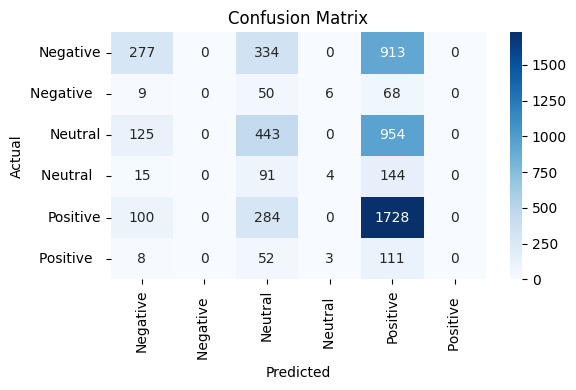

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


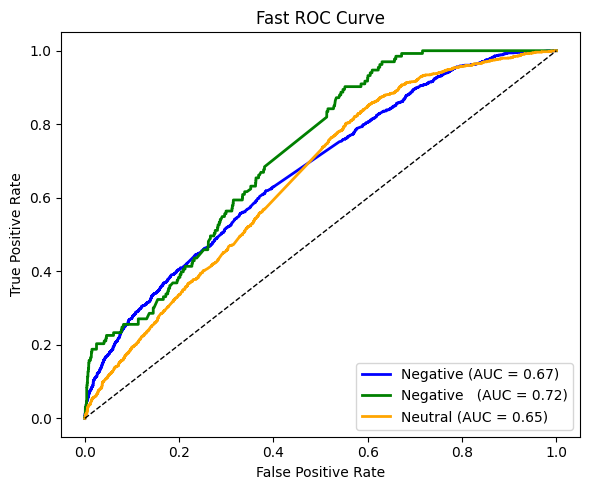

In [10]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Label binarization
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_score = rf_model.predict_proba(X_test)

# Handle binary class case for faster execution
if y_test_bin.shape[1] == 1:
    y_test_bin = np.hstack((1 - y_test_bin, y_test_bin))
    y_score = np.hstack((1 - y_score, y_score))

# Calculate ROC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(6, 5))
colors = ['blue', 'green', 'orange']
for i, color in zip(range(y_test_bin.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{lb.classes_[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Fast ROC Curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


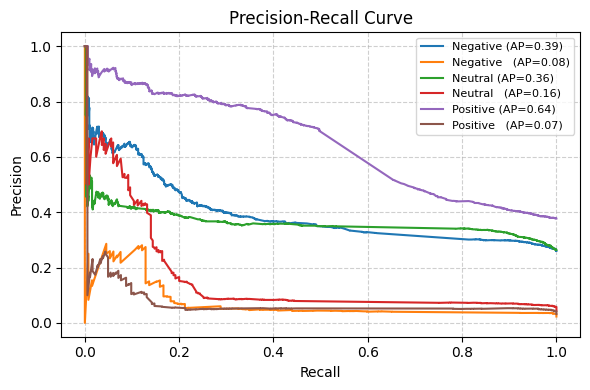

In [2]:
# Import all needed modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset (adjust filename and sheet if needed)
df = pd.read_excel("tammicomment.xlsx")
df = df.iloc[:, [0, 2]]  # selecting relevant columns
df.columns = ['comment', 'label']
df.dropna(inplace=True)
df['comment'] = df['comment'].astype(str)

# Preprocess: TF-IDF + Train-test split (simplified)
vectorizer = TfidfVectorizer(max_features=2000)  # Reduce max features further
X = vectorizer.fit_transform(df['comment'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model (reduced trees and depth)
rf_model = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities and binarize labels
y_score = rf_model.predict_proba(X_test)
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Plot Precision-Recall Curve with optimization
plt.figure(figsize=(6, 4))  # smaller size for faster rendering
for i in range(len(classes)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap_score = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=1.5, label=f'{classes[i]} (AP={ap_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(fontsize=8)
plt.tight_layout()  # Speed optimization for layout
plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better visibility
plt.show()


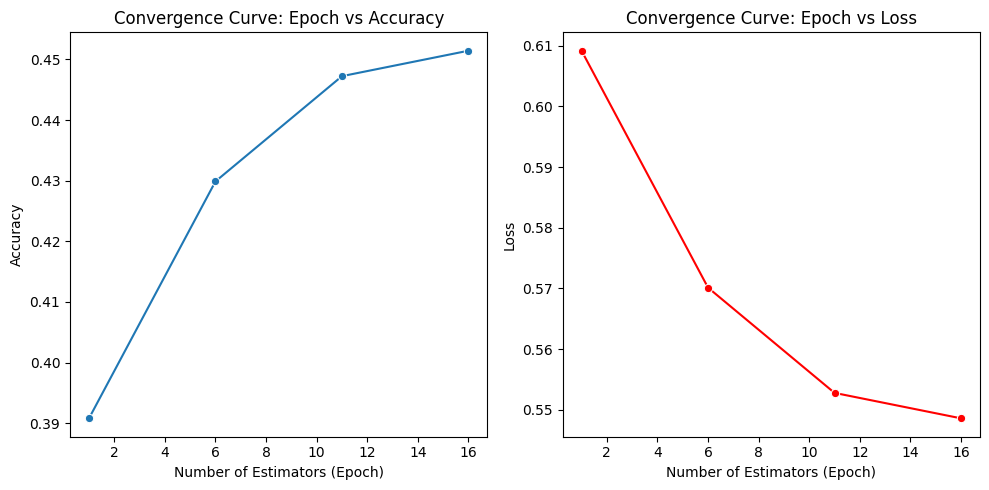

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset (adjust filename and sheet if needed)
df = pd.read_excel("tammicomment.xlsx")
df = df.iloc[:, [0, 2]]
df.columns = ['comment', 'label']
df.dropna(inplace=True)
df['comment'] = df['comment'].astype(str)

# Preprocess: TF-IDF + Train-test split
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['comment'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simulating convergence: training RF with increasing number of estimators
train_accuracies = []
train_losses = []
estimators = range(1, 21, 5)  # Further reduce the range of estimators for quicker results

for n in estimators:
    model = RandomForestClassifier(n_estimators=n, random_state=42, n_jobs=-1)  # Use all cores for faster training
    scores = cross_val_score(model, X_train, y_train, cv=2, scoring='accuracy')  # Reduced folds to 2 for speed
    acc = scores.mean()
    train_accuracies.append(acc)
    train_losses.append(1 - acc)

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.lineplot(x=estimators, y=train_accuracies, marker='o')
plt.title('Convergence Curve: Epoch vs Accuracy')
plt.xlabel('Number of Estimators (Epoch)')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(x=estimators, y=train_losses, marker='o', color='r')
plt.title('Convergence Curve: Epoch vs Loss')
plt.xlabel('Number of Estimators (Epoch)')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()
